### Multi Layer Perceptron

In [46]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset , Dataset
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm , trange

In [47]:
class SinDataset(Dataset):
    def __init__(self , num_samples=1000):
        super().__init__()
        self.x_data = torch.rand(num_samples , 1) * 18  - 9
        self.y_data = torch.sin(self.x_data) + 0.1 * torch.randn(num_samples , 1)
        self.y_data += torch.rand_like(self.y_data) / 20 # adding some noise


    def __len__(self):
        return self.x_data.shape[0]

    def __getitem__(self, idx):
        return self.x_data[idx] , self.y_data[idx]
    

Exception ignored in: <function tqdm.__del__ at 0x7bbb2950bd00>
Traceback (most recent call last):
  File "/home/sahildev/Development/Projects/DS_Practice/venv/lib/python3.10/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/sahildev/Development/Projects/DS_Practice/venv/lib/python3.10/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x7bbb2950bd00>
Traceback (most recent call last):
  File "/home/sahildev/Development/Projects/DS_Practice/venv/lib/python3.10/site-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/home/sahildev/Development/Projects/DS_Practice/venv/lib/python3.10/site-packages/tqdm/notebook.py", line 279, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <funct

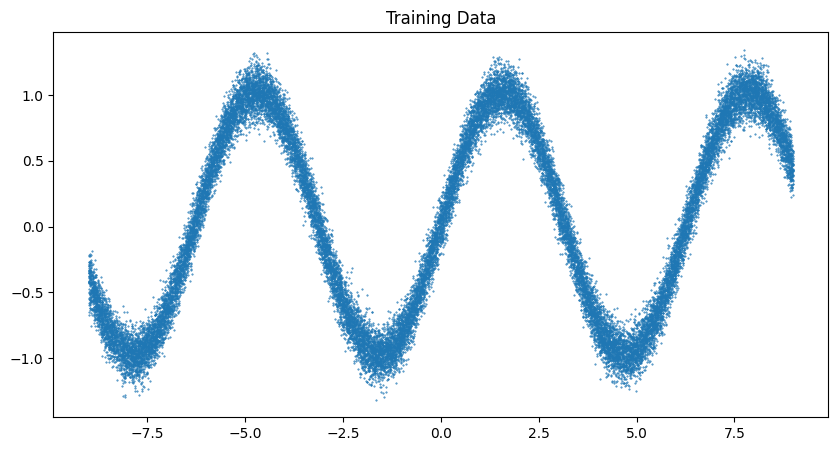

In [48]:
n_x_train = 30000
n_x_test = 8000
batch_size = 256

train_dataset = SinDataset(num_samples=n_x_train)
test_dataset = SinDataset(num_samples=n_x_test)

train_loader = DataLoader(train_dataset , batch_size=batch_size , shuffle=True)
test_loader = DataLoader(test_dataset , batch_size=batch_size , shuffle=False)


fig = plt.figure(figsize=(10,5))
plt.scatter(train_dataset.x_data , train_dataset.y_data  , s=0.2)
plt.title("Training Data")
plt.show()


In [49]:
class ShallowNeuralNetwork(nn.Module):
    def __init__(self, input_size=1 , hidden_size=64 , output_size=1):
        super().__init__()
        self.layer1  = nn.Linear(input_size, hidden_size)
        self.layer2  = nn.Linear(hidden_size, hidden_size)
        self.layer3  = nn.Linear(hidden_size, output_size)

    def forward(self , x ):
        x = self.layer1(x)
        x = torch.tanh(x)
        x = self.layer2(x)
        x = torch.tanh(x)
        x = self.layer3(x)
        return x


In [62]:
learning_rate = 0.001
num_epochs = 2000
input_size = 1
hidden_size = 64
output_size = 1

model = ShallowNeuralNetwork(input_size=input_size , hidden_size=hidden_size , output_size=output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters() , lr=learning_rate)

loss_history = []

for epoch in trange(num_epochs , desc="Epochs" , leave=False):
    print(epoch)

    # for x , y in tqdm(train_loader , desc="Batches" , leave=False):
    #     pass

    pass
    
    # output = model(train_loader.dataset.x_data)
    # l = criterion(output , train_loader.dataset.y_data)
    # optimizer.zero_grad()  # Zero the gradients before backpropagation
    # l.backward()          # Backpropagation
    # optimizer.step()      # Update the weights
    # loss_history.append(l.item())
    # if epoch % 100 == 0:
    #     print(f"Epoch {epoch} : Loss = {l.item():.2f}")

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

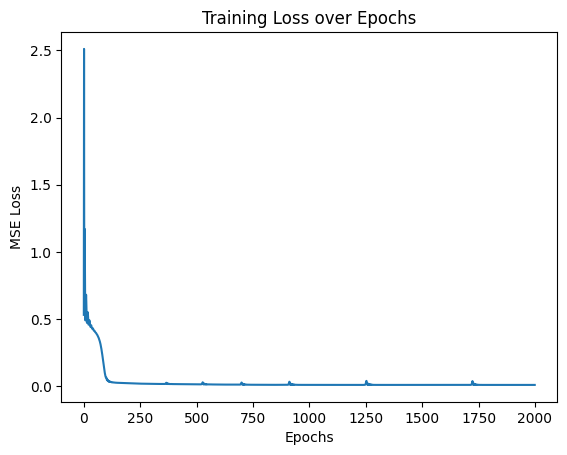

In [ ]:
plt.plot(loss_history)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()